In [1]:
## Resolution effects on the acceleration

In [1]:
%pylab inline
import biff
from scipy import special
import pygadgetreader
import reading_snapshots
#import gala
from gadget_read_snap import read_snap

Populating the interactive namespace from numpy and matplotlib


In [2]:
r_s_sims = 40.85
G_gadget=43007.1 #kpc3/(Gyr2Msun)/1E10. 

In [3]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)


In [4]:
snap_gadget_1e6 = read_snap('./MW/gadget3_MW5_100M_b1_dmhalopart_elgato_1e6_001')
acc_gadget_1e6 = snap_gadget_1e6[2]
pos_gadget_1e6 = snap_gadget_1e6[0]
pot_gadget_1e6 = snap_gadget_1e6[1]


256
12000000 blocksize pp
4000000 blocksize ids
4000000 blocksize mass


In [5]:
snap_gadget_1e8 = read_snap('./MW/gadget3_MWLMC5_100M_b1_dmhalopart_elgato_1e8_001')
acc_gadget_1e8 = snap_gadget_1e8[2]
pos_gadget_1e8 = snap_gadget_1e8[0]
pot_gadget_1e8 = snap_gadget_1e8[1]

256
1200000000 blocksize pp
400000000 blocksize ids
400000000 blocksize mass


In [12]:
r_sims_6 = (pos_gadget_1e6[:,0]**2 + pos_gadget_1e6[:,1]**2 + pos_gadget_1e6[:,2]**2)**0.5
r_sims_8 = (pos_gadget_1e8[:,0]**2 + pos_gadget_1e8[:,1]**2 + pos_gadget_1e8[:,2]**2)**0.5

a_sims_6 = (acc_gadget_1e6[:,0]**2 + acc_gadget_1e6[:,1]**2 + acc_gadget_1e6[:,2]**2)**0.5
a_sims_8 = (acc_gadget_1e8[:,0]**2 + acc_gadget_1e8[:,1]**2 + acc_gadget_1e8[:,2]**2)**0.5

In [13]:
def a_r(r, a, bins, rmax):
    r_bin = np.linspace(min(r), rmax, bins)
    a_mean = np.zeros(bins)
    a_std = np.zeros(bins)
    for i in range(bins-1):
        dr = np.where((r>r_bin[i]) & (r<r_bin[i+1]))[0]
        a_mean[i] = np.nanmean(a[dr])
        a_std[i] = np.nanstd(a[dr])
    return r_bin, a_mean, a_std
        

In [14]:
rbins6, a_mean6, a_std6 = a_r(r_sims_6, a_sims_6, 100, 300 )
rbins8, a_mean8, a_std8 = a_r(r_sims_8, a_sims_8, 100, 300 )

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0,0.5,'$\\Delta a$')

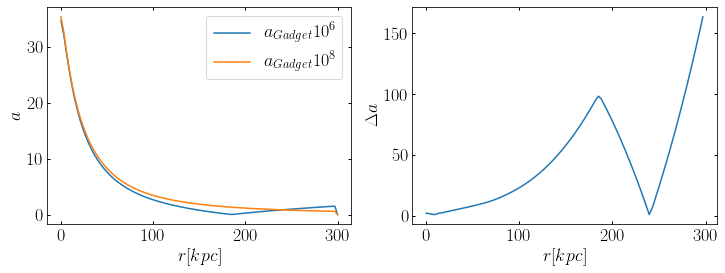

In [76]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(rbins6, a_mean6, label='$a_{Gadget} 10^6$')
ax1.plot(rbins8, a_mean8/100., label='$a_{Gadget} 10^8$')
ax1.legend()
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$a$')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(rbins6, 100*np.abs(a_mean6-a_mean8/100.)/(a_mean8/100.))
ax2.set_xlabel(r'$r[kpc]$')
ax2.set_ylabel(r'$\Delta a$')


# BFE

In [37]:
## Reading coefficients 
coeff_c = np.loadtxt('MW/MW_bfe_b1_1e6.txt')
S_mw_1e6 = coeff_c[:,0]
T_mw_1e6 = coeff_c[:,1]

S_matrix_mw_1e6 = np.zeros((21, 21, 21))
T_matrix_mw_1e6 = np.zeros((21, 21, 21))


counter = 0
for n in range(21):
    for l in range(21):
        for m in range(0, l+1):
            S_matrix_mw_1e6[n][l][m] = S_mw_1e6[counter]
            T_matrix_mw_1e6[n][l][m] = T_mw_1e6[counter]
            counter +=1

In [38]:
## Reading coefficients 
coeff_c = np.loadtxt('MW/MW_bfe_b1_1e8.txt')
S_mw_1e8 = coeff_c[:,0]
T_mw_1e8 = coeff_c[:,1]

S_matrix_mw_1e8 = np.zeros((21, 21, 21))
T_matrix_mw_1e8 = np.zeros((21, 21, 21))


counter = 0
for n in range(21):
    for l in range(21):
        for m in range(0, l+1):
            S_matrix_mw_1e8[n][l][m] = S_mw_1e6[counter]
            T_matrix_mw_1e8[n][l][m] = T_mw_1e6[counter]
            counter +=1

In [58]:
N_rand_1e6 = np.random.randint(0, 1000000, 10000)
N_rand_1e8 = np.random.randint(0, 100000000, 10000)

In [59]:
a_all = biff.gradient(np.ascontiguousarray(np.double(pos_gadget_1e6[N_rand_1e6])), 
                    S_matrix_mw_1e6, T_matrix_mw_1e6, G=G_gadget, M=1, r_s=r_s_sims)

In [60]:
a_all8 = biff.gradient(np.ascontiguousarray(np.double(pos_gadget_1e8[N_rand_1e8])), 
                    S_matrix_mw_1e8, T_matrix_mw_1e8, G=G_gadget, M=1, r_s=r_s_sims)

In [61]:
r_rand_1e6 = (pos_gadget_1e6[N_rand_1e6,0]**2 + pos_gadget_1e6[N_rand_1e6,1]**2 + pos_gadget_1e6[N_rand_1e6,2]**2)**0.5
r_rand_1e8 = (pos_gadget_1e8[N_rand_1e8,0]**2 + pos_gadget_1e8[N_rand_1e8,1]**2 + pos_gadget_1e8[N_rand_1e8,2]**2)**0.5

In [62]:
a_mag_6 = (a_all[:,0]**2 + a_all[:,1]**2 + a_all[:,2]**2)**0.5 
a_mag_8 = (a_all8[:,0]**2 + a_all8[:,1]**2 + a_all8[:,2]**2)**0.5 

In [63]:
rbins6_bfe, a_mean6_bfe, a_std6_bfe = a_r(r_rand_1e6, a_mag_6, 100, 300)
rbins8_bfe, a_mean8_bfe, a_std8_bfe = a_r(r_rand_1e8, a_mag_8, 100, 300)

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0,0.5,'$\\Delta a$')

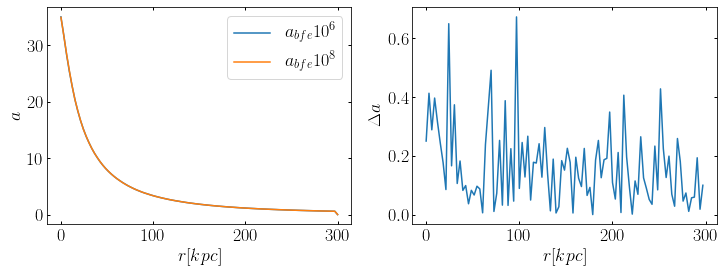

In [73]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(rbins6_bfe, a_mean6_bfe, label='$a_{bfe} 10^6$')
ax1.plot(rbins8_bfe, a_mean8_bfe, label='$a_{bfe} 10^8$')
ax1.legend()
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$a$')

ax1 = fig.add_subplot(1,2,2)
ax1.plot(rbins6_bfe, 100*np.abs(a_mean6_bfe-a_mean8_bfe)/(a_mean8_bfe), )
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$\Delta a$')


/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Text(0,0.5,'$\\Delta a = 100 |(\\frac{a_{BFE}}{a_{gadget}} - 1)|$')

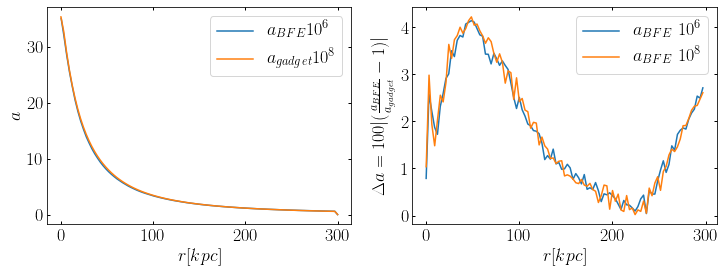

In [89]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(rbins6_bfe, a_mean6_bfe, label='$a_{BFE} 10^6$')
ax1.plot(rbins8, a_mean8/100., label='$a_{gadget} 10^8$')
ax1.legend()
ax1.set_xlabel(r'$r[kpc]$')
ax1.set_ylabel(r'$a$')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(rbins6_bfe, 100*np.abs(a_mean6_bfe-a_mean8/100.)/(a_mean8/100.), label=r'$a_{BFE}\ 10^6$')
ax2.plot(rbins8_bfe, 100*np.abs(a_mean8_bfe-a_mean8/100.)/(a_mean8/100.), label=r'$a_{BFE}\ 10^8$')
ax2.legend()
ax2.set_xlabel(r'$r[kpc]$')
ax2.set_ylabel(r'$\Delta a = 100 |(\frac{a_{BFE}}{a_{gadget}} - 1)|$')

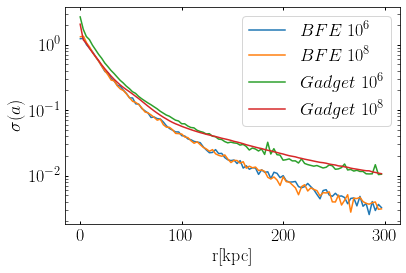

In [87]:
# 

semilogy(rbins6_bfe, a_std6_bfe, label='$BFE\ 10^6$')
semilogy(rbins8_bfe, a_std8_bfe, label='$BFE\ 10^8$')
semilogy(rbins6, a_std6, label='$Gadget\ 10^6$')
semilogy(rbins6, a_std8/100.,  label='$Gadget\ 10^8$')
xlabel('r[kpc]')
ylabel('$\sigma(a)$')
legend()
